In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Reading and Displaying Images using OpenCV

In [3]:
img=cv2.imread("/content/drive/MyDrive/DIP/Lenna.png")
#second parameter cv2.IMREAD_GRAYSCALE averages the channels
#cv2.IMREAD_COLOR reads as RGB but ignores transparency

In [4]:
np.shape(img)

(512, 512, 3)

In [5]:
from google.colab.patches import cv2_imshow 
#using cv2.imshow directly causes colab sessions to crash, instead, import cv2_imshow

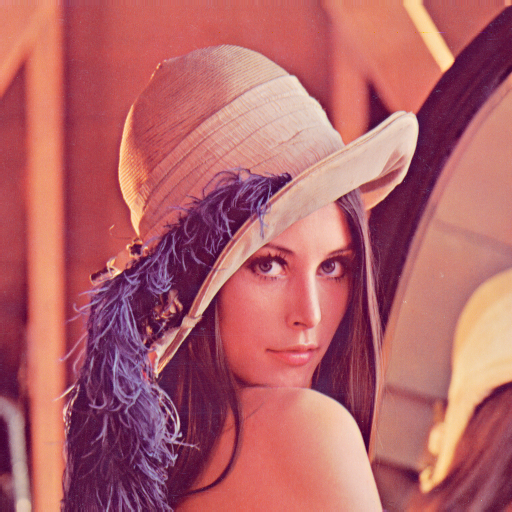

In [6]:
cv2_imshow(img)
#cv2 stores colors as BGR

## RGB to GRAY conversion 

In [7]:
#RGB TO GRAY conversion

**Converting RGB to Gray using inbuilt function**

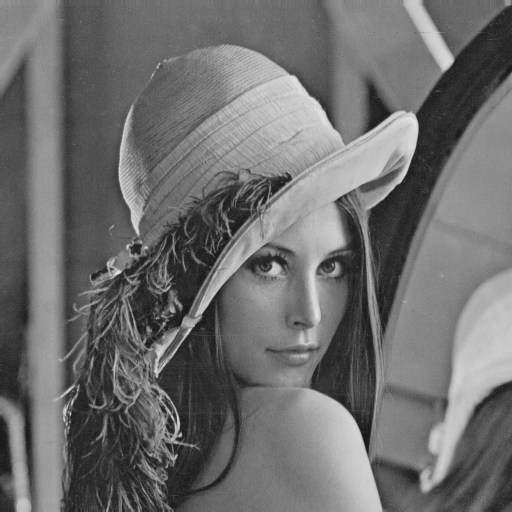

In [8]:
grayimg=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#grayimg2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) gives a grayscale with different channels
cv2_imshow(grayimg)

In [9]:
#inbuilt RGB2GRAY uses the formula
# Y = 0.299 R + 0.587 G + 0.114 B

**RGB to Gray by averaging the pixel value from each channel**

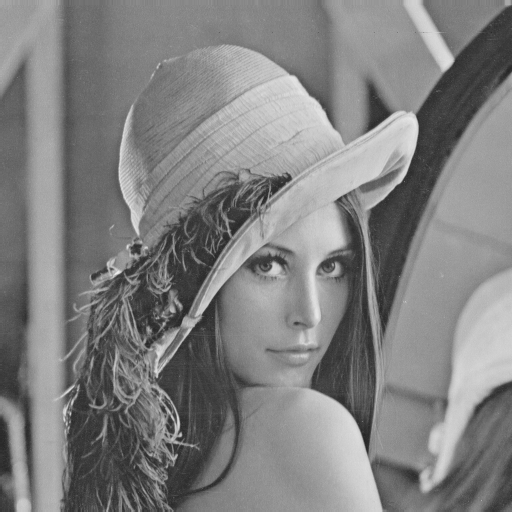

In [10]:
#RGB to gray manual using average
manualgray = np.empty(shape=[512, 512])
#matrices in python are a bitch
img=np.array(img)
img2=img.astype(int)
#typecasting 2D array requires it to be converted to numpy array
#typecast to int is necessary coz imread stores as uint8, which easily overflows during calculations
for i in range(0,512):
  temp=[]
  for j in range(0,512):
    manualgray[i][j]=math.ceil(((int(img[i][j][0])+int(img[i][j][1])+int(img[i][j][2])))/3)

cv2_imshow(manualgray)


**RGB to Gray using the Formula**

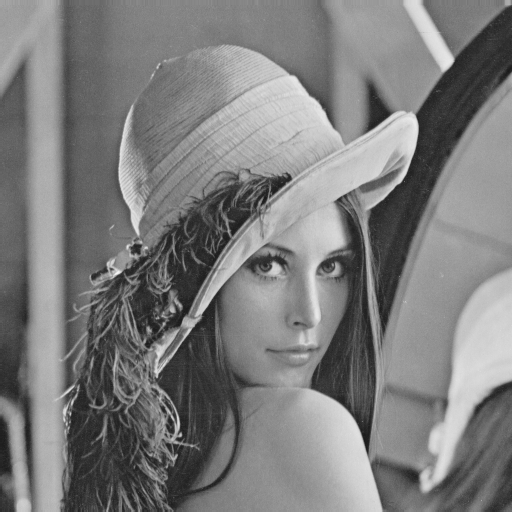

In [11]:
#RGB to Gray using formula

manualgray = np.empty(shape=[512, 512])

img=np.array(img)
img2=img.astype(int)
#typecasting 2D array requires it to be converted to numpy array
#typecast to int is necessary coz imread stores as uint8, which easily overflows during calculations
for i in range(0,512):
  temp=[]
  for j in range(0,512):
    manualgray[i][j]=math.ceil(int(img[i][j][0])*0.114+int(img[i][j][1])*0.587+int(img[i][j][2])*0.299)
    
cv2_imshow(manualgray)



## Manipulating individual Channels

**Displaying each channel separately**

Text(0.5, 1.0, 'red layer')

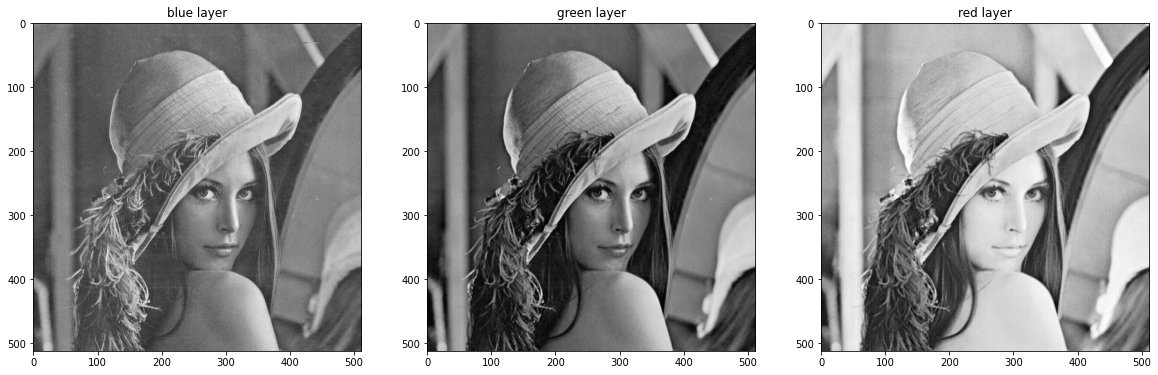

In [12]:
#extracting different layers from an image

lblue=np.empty(shape=[512,512])
lgreen=np.empty(shape=[512,512])
lred=np.empty(shape=[512,512])

for i in range(512):
  for j in range(512):
    lblue[i][j]=img[i][j][0]
    lgreen[i][j]=img[i][j][1]
    lred[i][j]=img[i][j][2]
  
plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.imshow(lblue,cmap='gray')
plt.title('blue layer')
plt.subplot(1,3,2)
plt.imshow(lgreen,cmap='gray')
plt.title('green layer')
plt.subplot(1,3,3)
plt.imshow(lred,cmap='gray')
plt.title('red layer')

#IMSHOW WITH MATPLOTLIB NEEDS THE PARAMETER cmap='gray' TO DISPLAY 2D MATRIX AS GRAYSCALE
#ELSE IMAGE DISPLAYED AS COLORMAP

In [13]:
# #switch lsb to 0 and recombine the layers

# lsbmat=np.empty(shape=[512,512,3])
# for i in range(512):
#   for j in range(512):
#     for k in range(3):
#       tempbin=bin(img[i][j][k]); #converts int to binary string
#       templst=list(tempbin) #convert string to list for conversion
#       lenlst=len(templst)
#       templst[lenlst-1]='0'
#       tempbin="".join(templst) #converts list to string
#       finalval=int(tempbin,2) #converts binary to int, 2 specifies base
#       lsbmat[i][j][k]=finalval

# lsbmat=lsbmat.astype(np.uint8) #IMPORTANT : converts image back to type uint
# #depth of image refers to precision of each pixel, and can be 8, 24, 32 and so on
# # lsbmat=cv2.cvtColor(lsbmat,cv2.COLOR_BGR2RGB)
# lsbRGB=cv2.cvtColor(lsbmat,cv2.COLOR_BGR2RGB)
# imgRGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(20,20))
# plt.subplot(1,2,1)
# plt.imshow(imgRGB)
# plt.title('Original Image')
# plt.subplot(1,2,2)
# plt.imshow(lsbRGB)
# plt.title('LSB zero\'d image')

**Retaining only one channel while setting the remaining to 0**

Text(0.5, 1.0, 'blue layer')

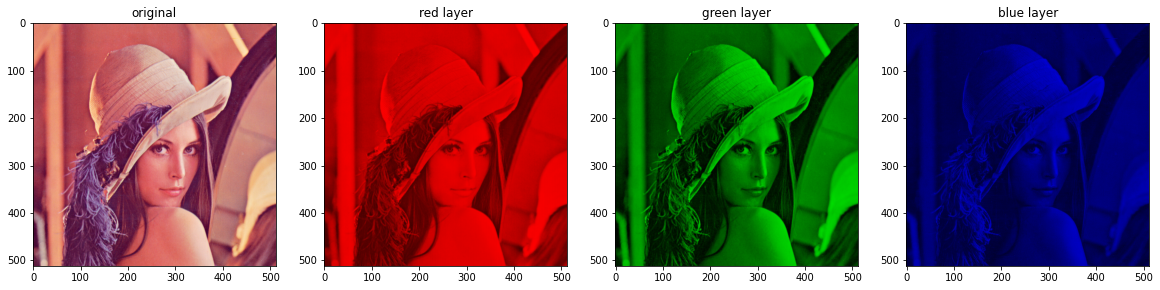

In [14]:
#single layer extraction, rest all zero

layerb=np.empty(shape=[512,512,3])
layerg=np.empty(shape=[512,512,3])
layerr=np.empty(shape=[512,512,3])
for i in range(512):
  for j in range(512):
    layerb[i][j][0]=img[i][j][0]
    layerb[i][j][1]=0
    layerb[i][j][2]=0
    
    layerg[i][j][0]=0
    layerg[i][j][1]=img[i][j][1]
    layerg[i][j][2]=0

    layerr[i][j][0]=0
    layerr[i][j][1]=0
    layerr[i][j][2]=img[i][j][2]


layerrRGB=layerr.astype(np.uint8)
layergRGB=layerg.astype(np.uint8)
layerbRGB=layerb.astype(np.uint8)

layerbRGB=cv2.cvtColor(layerbRGB,cv2.COLOR_BGR2RGB)
layergRGB=cv2.cvtColor(layergRGB,cv2.COLOR_BGR2RGB)
layerrRGB=cv2.cvtColor(layerrRGB,cv2.COLOR_BGR2RGB)

imgRGB=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,20))
plt.subplot(1,4,1)
plt.imshow(imgRGB)
plt.title('original')
plt.subplot(1,4,2)
plt.imshow(layerrRGB)
plt.title('red layer')
plt.subplot(1,4,3)
plt.imshow(layergRGB)
plt.title('green layer')
plt.subplot(1,4,4)
plt.imshow(layerbRGB)
plt.title('blue layer')

## Histogram Equalization

In [15]:
#FAILED ATTEMPT AT HIST EQ -------------------------------------------------------------------------------------

In [16]:
# #HISTOGRAM EQUALIZATION 
# sample=cv2.imread("/content/drive/MyDrive/DIP/heq.png",cv2.IMREAD_GRAYSCALE)
# cv2_imshow(sample)

In [17]:
# #scaling down the image to 8 by 8
# sample2=np.empty(shape=[192,192]) #8 by 8 sample image
# for i in range(0,1920,10):
#   for j in range(0,1920,10):
#     index1=int(i/10);
#     index2=int(j/10);
#     sample2[index1][index2]=sample[i][j]
# cv2_imshow(sample2)

In [18]:
# hawk=cv2.imread("/content/drive/MyDrive/DIP/hawk.jpg",cv2.IMREAD_GRAYSCALE)
# cv2_imshow(hawk)

In [19]:
# intensity=np.empty(shape=[256,1])
# for i in range(683):
#   for j in range(1024):
#     pixelvalue=int(hawk[i][j])
#     intensity[pixelvalue]+=1;

# cdf=np.empty(shape=[256,1])
# cdf[0]=intensity[0]
# for i in range(1,256):
#   cdf[i]=cdf[i-1]+intensity[i]

In [20]:
# np.shape(hawk)

In [21]:
# equalizedval=np.empty(shape=[256,1]) #array of equalized values
# for i in range(0,256):
#   temp=np.round(((cdf[i]-cdf[0])/(192**2-cdf[0]))*255) #simple "round()" not supported with numpy arrays
#   equalizedval[i]=temp

In [22]:
#reconstructing image
# hawk0=np.empty(shape=[1024,683])
# for i in range(684):
#   for j in range(1025):
#     tempval=int(hawk[i][j])
#     hawk0[i][j]=equalizedval[tempval]

# plt.subplot(1,2,1)
# plt.imshow(hawk,cmap='gray')
# plt.title("original image 192*192")
# plt.subplot(1,2,2)
# plt.imshow(hawk0,cmap='gray')
# plt.title("equalized image")

In [23]:
# sample0=sample0.astype(np.uint8)
# cv2_imshow(sample2)

In [24]:
#FAILED ATTEMPT AT HIST EQ -------------------------------------------------------------------------------------


In [25]:
#renewed attempt at histeq
# hawk=cv2.imread("/content/drive/MyDrive/DIP/hawk.jpg")
# hawk=cv2.cvtColor(hawk,cv2.COLOR_BGR2GRAY)

# intensity=np.empty(shape=[256,1]) #np.empty creates empty matrix in reverse order ie shape=[col,row]
# for i in range(683):
#   for j in range(1024):
#     temp=int(hawk[i][j])
#     intensity[temp]+=1

# cdf=np.empty(shape=[256,1])
# cdf[0]=intensity[0]
# for i in range(1,256):
#   cdf[i]=cdf[i-1]+intensity[i]

# equalizedval=np.empty(shape=[256,1]) #array of equalized values
# for i in range(0,256):
#   temp=np.round(((cdf[i]-cdf[0])/(192**2-cdf[0]))*255) #simple "round()" not supported with numpy arrays
#   equalizedval[i]=temp

# #reconstructing image
# hawk0=np.empty(shape=[683,1024])
# for i in range(683):
#   for j in range(1024):
#     tempval=int(hawk[i][j])
#     hawk0[i][j]=equalizedval[tempval]

# hawk0=hawk0.astype(np.uint8)
# cv2_imshow(hawk)
# print()
# print()
# cv2_imshow(hawk0)

In [26]:
#another failed attempt----

In [27]:
#attempt 3---

**Attempting Histogram Equalization on a small image first**

In [28]:
bitimg=[52,55,61,59,79,61,76,61,62,59,55,104,94,85,59,71,63,65,66,113,144,104,63,72,64,70,70,126,154,109,71,69,67,73,68,106,122,88,68,68,68,79,60,70,77,66,58,75,69,85,64,58,55,61,65,83,70,87,69,68,65,73,78,90]

8 by 8 image generated manually

In [29]:
bit=np.zeros(shape=[8,8])
k=0
for i in range(8):
  for j in range(8):
    temp=bitimg[k]
    bit[i][j]=temp
    k+=1

bit=bit.astype(np.uint8)
cv2_imshow(bit)

In [30]:
values=np.zeros((1,256))
for i in range(8):
  for j in range(8):
    temp=int(bit[i][j])
    values[0][temp]+=1

cdf=np.zeros([1,256])
cdf[0][0]=values[0][0]
for i in range(1,256):
  cdf[0][i]=cdf[0][i-1]+values[0][i]

equal=np.zeros([1,256])
for i in range(256):
  equal[0][i]=np.floor(((cdf[0][i]-1)/(63-cdf[0][0]))*255)
  if equal[0][i]<0:
    equal[0][i]=0

bit2=np.zeros(shape=[8,8])

for i in range(8):
  for j in range(8):
    temp=int(bit[i][j])
    temp=equal[0][temp]
    bit2[i][j]=temp

values2=np.zeros((1,256))
for i in range(8):
  for j in range(8):
    temp=int(bit2[i][j])
    values2[0][temp]+=1

bit2=bit2.astype(np.uint8)
cv2_imshow(bit2)

In [31]:
#a working attempt finally---


**Distribution of pixel intensities over the original and equalized images**

Text(0.5, 1.0, 'new distribution')

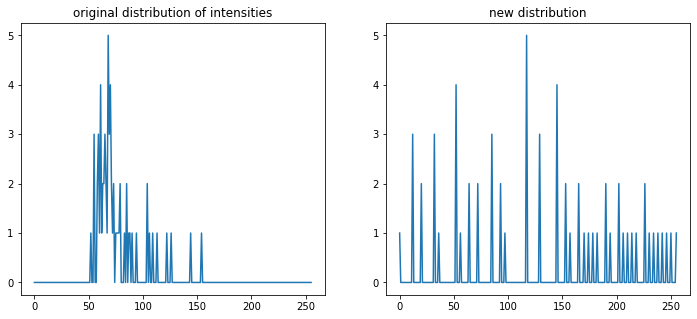

In [32]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(values[0])
plt.title("original distribution of intensities")
plt.subplot(1,2,2)
plt.plot(values2[0])
plt.title("new distribution")

In [33]:
cv2.imwrite("/content/drive/MyDrive/DIP/heqequalized.png",bit2)

True

**Extending the logic to a larger image**

In [34]:
# applying same logic on hawk image

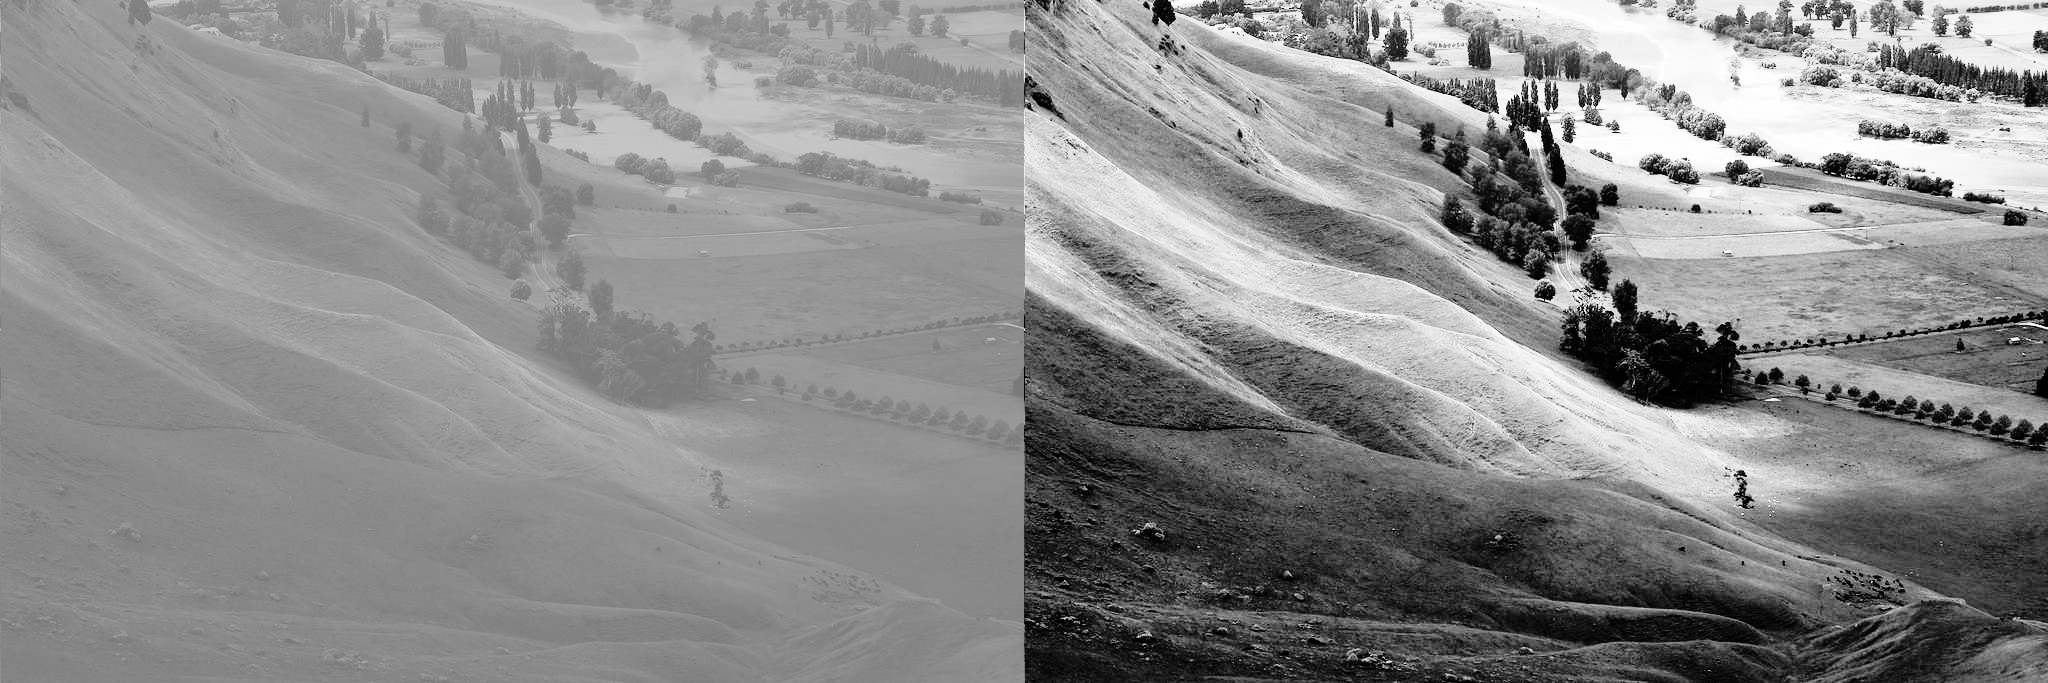

True

In [35]:
hawkimg=cv2.imread("/content/drive/MyDrive/DIP/hawk.jpg",cv2.IMREAD_GRAYSCALE)
intens=np.zeros(shape=[1,256])

temprow,tempcol=np.shape(hawkimg)

for i in range(temprow):
  for j in range(tempcol):
    temp=int(hawkimg[i][j])
    intens[0][temp]+=1

cdfhawk=np.zeros(shape=[1,256])
cdfhawk[0][0]=intens[0][0]

for i in range(1,256):
  cdfhawk[0][i]=cdfhawk[0][i-1]+intens[0][i]

cdfmin=0
for i in range(256):
  if (cdfhawk[0][i]>0):
    cdfmin=cdfhawk[0][i]
    break

equalizedvalues=np.zeros(shape=[1,256])

for i in range(256):
  equalizedvalues[0][i]=np.floor(((cdfhawk[0][i]-cdfmin)/(temprow*tempcol-cdfmin))*255)
  if equalizedvalues[0][i]<0:
    equalizedvalues[0][i]=0
  elif equalizedvalues[0][i]>255:
    equalizedvalues[0][i]=255
  else:
    continue

reconstructed=np.empty(shape=[temprow,tempcol])

for i in range(temprow):
  for j in range(tempcol):
    temp=int(hawkimg[i][j])
    reconstructed[i][j]=equalizedvalues[0][temp]

newintens=np.zeros(shape=[1,256])
for i in range(temprow):
  for j in range(tempcol):
    temp=int(reconstructed[i][j])
    newintens[0][temp]+=1

reconstructed=reconstructed.astype(np.uint8)


# plt.figure(figsize=(12,5))
# plt.subplot(1,2,1)
# plt.imshow(hawkimg,cmap='gray')
# plt.title("original image")
# plt.subplot(1,2,2)
# plt.imshow(reconstructed,cmap='gray')
# plt.title("equalized image")

Hori = np.concatenate((hawkimg, reconstructed), axis=1)
cv2_imshow(Hori)
cv2.imwrite("/content/drive/MyDrive/DIP/hawkequalized.png",Hori)
cv2.imwrite("/content/drive/MyDrive/DIP/hawkrecon.png",reconstructed)

Stem plot of distribution of Pixel Intensities

<ipython-input-36-e5ff63f413d0>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(intens[0])
<ipython-input-36-e5ff63f413d0>:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(newintens[0])


Text(0.5, 1.0, 'new distribution')

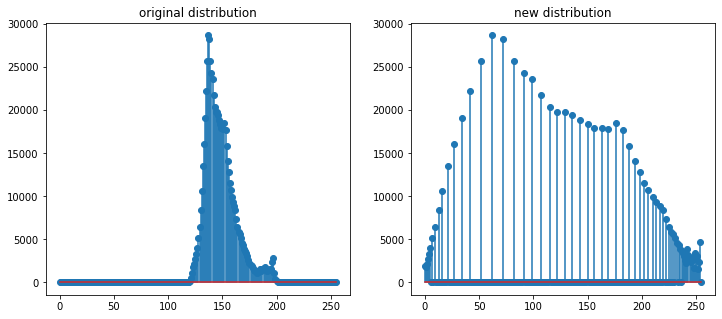

In [36]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.stem(intens[0])
plt.title("original distribution")
plt.subplot(1,2,2)
plt.stem(newintens[0])
plt.title("new distribution")